In [1]:
import torch
import numpy as np

In [21]:
from torch.utils.data import Dataset



### DataLoader의 input

1. Dataset
2. Batch_size
3. shuffle
4. num_workers : 데이터 로딩에 사용할 병렬 처리 개수
5. pin_memory : GPU memory에 pin 할 것인지

### CIFAR10 데이터셋 불러오기

In [23]:
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os

In [4]:
### cache 폴더 생성하기
os.makedirs("../data_file", exist_ok = True)

In [5]:
training_data = datasets.CIFAR10(
    root = '../data_file',
    train= True,
    download = True,
    transform = ToTensor() # 데이터셋을 텐서값으로 변환해서 넘겨줌
)
test_data = datasets.CIFAR10(
    root = '../data_file',
    train = False,
    download = True,
    transform = ToTensor()
)


Files already downloaded and verified
Files already downloaded and verified


In [6]:
labels_map = {
    0 : 'plane',
    1 : 'car',
    2 : 'bird',
    3 : 'cat',
    4 : 'deer',
    5 : 'dog',
    6 : 'frog',
    7 : 'horse',
    8 : 'ship',
    9 : 'truck'
}


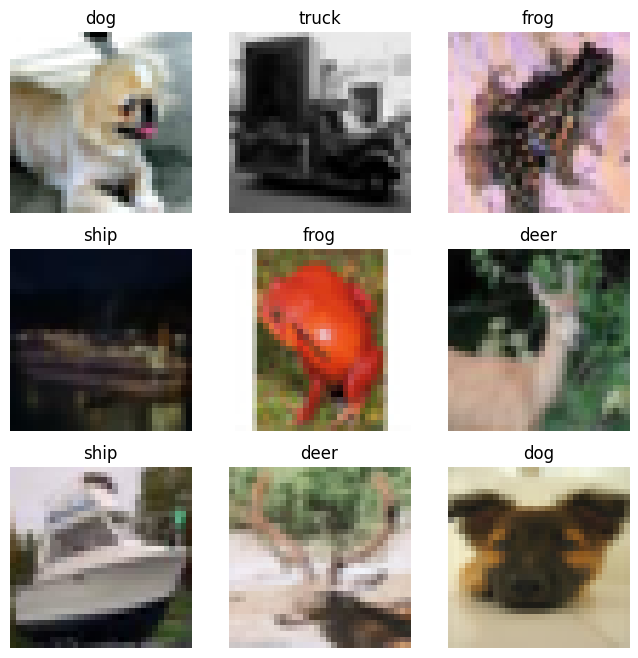

In [7]:
figure = plt.figure(figsize = (8,8))
cols , rows = 3,3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size = (1,)).item()
    img, label = training_data[sample_idx]


    figure.add_subplot(rows, cols , i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.permute(1,2,0))
plt.show()

### 이미지 데이터 전처리

1. PLI library로 이미지 파일 읽기
2. PLI로 읽어온 이미지를 numpy 배열로 변환하기
3. Numpy 배열을 Torch Tensor로 변환해주기

### PLI로 파일 읽어오기

In [8]:
from PIL import Image

In [9]:
img = Image.open("./sample_images/cat_img.jpeg")

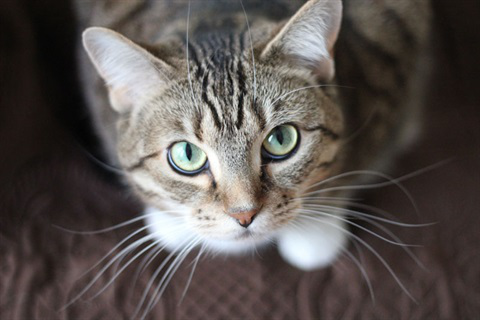

In [10]:
img

In [11]:
img.size

(480, 320)

### Numpy로 변환해주기

In [12]:
np_img = np.array(img)

In [13]:
np_img.shape

(320, 480, 3)

### PIL.image -> ToTensor

In [14]:
tensor_img = ToTensor()(img)

In [15]:
tensor_img.shape

torch.Size([3, 320, 480])

### Numpy -> ToTensor

In [16]:
tensor_img2 = ToTensor()(np_img)

In [17]:
tensor_img2.shape

torch.Size([3, 320, 480])

### Dataset customize 하기

In [27]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):

    def __init__(self, annotations_file, img_dir, transform= None, target_transform = None):
        self.img_labels = pd.read_csv("annotations_file")
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def _len_(self): #데이터의 갯수 세
        return len(self.img_labels)


    def _getitem_(self, idx):  #실제 데이터를 전처리하는 함수, 한 개의 데이터를 처리하는 거라고 생각
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image= read_image(img_path)
        labels = self.img_labels.iloc[idx, 1]
        if self.transforms:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [25]:
from torch.utils.data import DataLoader

In [28]:
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = False)